D:\PYTHON\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


请输入要进行的操作：1.统计  2.清洗  3.建模  (输入e退出)：1
最大值： 120940
最小值： 426
平均值： 21548.836
中位数： 18080.0
 *** 程序正常
请输入要进行的操作：1.统计  2.清洗  3.建模  (输入e退出)：2


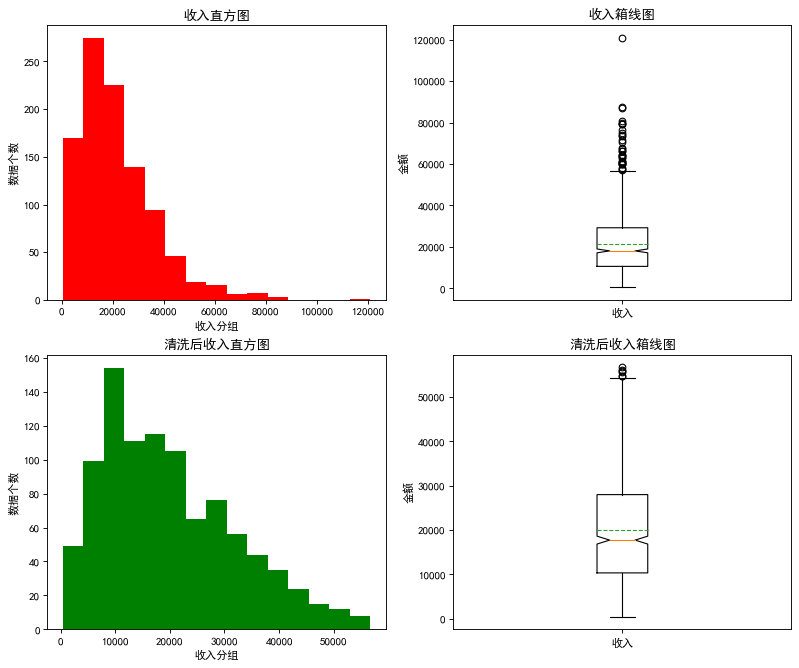

 *** 程序正常
请输入要进行的操作：1.统计  2.清洗  3.建模  (输入e退出)：3
准确率： 0.7783505154639175
请输入要进行的测试的数据：
性别【男/女】婚否【已婚/未婚】生育【已育/未育】收入【>=500】教育【高中/本科/硕士/博士】英语【四级以下/四级/六级/六级以上】好友数【0以上】消费理念(信用卡消费占比)【0~1】(输入e可退出)
请输入值（各值之间用一个空格分隔）：e
已退出 3.建模 程序！
 *** 程序正常
请输入要进行的操作：1.统计  2.清洗  3.建模  (输入e退出)：e
 *** 退出程序


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = "SimHei"  # 正常显示中文
from sklearn.model_selection import train_test_split  # 划分数据集库
from sklearn.preprocessing import StandardScaler as ss # 标准化库
from sklearn.svm import SVC  # 模型库
# 消除警告的命令
import warnings
warnings.filterwarnings("ignore")

# 统计函数
def quant_stat_def(data_df):
    in_v2 = data_df["收入"]

    print("最大值：",in_v2.max())
    print("最小值：",in_v2.min())
    print("平均值：",in_v2.mean())
    print("中位数：",in_v2.median())

# 绘制图形
def quant_matp_def(data_df):
    in_v2 = data_df["收入"]
    
    # 创建画布    
    fig = plt.figure(figsize=(12,10), dpi = 80)

    plt.subplot(2,2,1)
    # 含异常值直方图
    # 准备数据
    data_v2 = in_v2
    # 绘制图形
    hist_obj = plt.hist(data_v2, 15, color = "red")
    plt.title("收入直方图")
    plt.xlabel("收入分组")
    plt.ylabel("数据个数")

    plt.subplot(2,2,2)
    # 含异常值箱线图
    # 准备数据
    data_v2 = in_v2
    # 绘制图形
    box_obj = plt.boxplot(data_v2,notch = True, meanline = True, showmeans = True)
    plt.title("收入箱线图")
    plt.ylabel("金额")
    plt.xticks([1],["收入"])  # 添加 x 轴刻度标签

    ### 剔除异常值
    except_v2 = list(box_obj["fliers"][0].get_ydata()) # 异常值
    bool_v2 = in_v2.isin(except_v2)
    use_df = data_df.loc[~bool_v2,:]

    in_v2 = use_df["收入"]

    plt.subplot(2,2,3)
    # 剔除异常值直方图
    # 准备数据
    data_v2 = in_v2
    # 绘制图形
    hist_obj = plt.hist(data_v2, 15, color = "green")
    plt.title("清洗后收入直方图")
    plt.xlabel("收入分组")
    plt.ylabel("数据个数")

    plt.subplot(2,2,4)
    # 剔除异常值箱线图
    # 准备数据
    data_v2 = in_v2
    # 绘制图形
    box_obj = plt.boxplot(data_v2,notch = True, meanline = True, showmeans = True) 
    plt.title("清洗后收入箱线图")
    plt.ylabel("金额")
    plt.xticks([1],["收入"])  # 添加 x 轴刻度标签
    
    # 保存显示图形
    plt.savefig("定量数据统计图.jpg")
    plt.show()

    return use_df # 返回的为清洗完成的值
    
# 创建分类模型
def model_def(use_df):
    # 六步

    # 1.准备数据,将数据分成特征集和数据集
    ## 1.1 特征集
    target_data = use_df["是否按期还款"]
    ## 1.2 数据集
    credit_data = use_df.iloc[:,1:]
    
    # 2.将准备的数据划分成 训练集 和 测试集
    ## 特征集 的 训练集 & 测试集 ，数据集 的 训练集 & 测试集
    train_credit_data, test_credit_data, train_target_data, test_target_data = \
    train_test_split(credit_data, target_data, test_size = 0.2, random_state = 35)
    ## train_teat_split(未划分的数据集，未划分的标签，test_size 划分比例，random_state 数据随机洗牌)
    # 3.标准化数据：去除数据之间的量纲差异和取值范围差异
    ## 3.1 训练规则
    std_scaler = ss().fit(train_credit_data)
    ## 3.2 应用规则
    train_credit_std = std_scaler.transform(train_credit_data)  # 对训练集标准化
    test_credit_std = std_scaler.transform(test_credit_data)   # 对测试集标准化
    
    # 4.创建模型
    svm2 = SVC().fit(train_credit_std, train_target_data)
    
    # 5.测试模型
    result_std = svm2.predict(test_credit_std)
    
    # 6.评价模型
    print("准确率：",((result_std == test_target_data.values).sum())/result_std.shape[0])
    
    # 7.使用模型
    print("请输入要进行的测试的数据：")
    
    while True:
        print("性别【男/女】婚否【已婚/未婚】生育【已育/未育】收入【>=500】教育【高中/本科/硕士/博士】英语【四级以下/四级/六级/六级以上】好友数【0以上】消费理念(信用卡消费占比)【0~1】(输入e可退出)")
        input_v3 = input("请输入值（各值之间用一个空格分隔）：")
        ## 退出
        if input_v3 == "e":
            print("已退出 3.建模 程序！")
            return
        ## 数据切片
        my_str = input_v3
        my_list = [i for i in my_str.split(" ")]
        ## 参数数量规范
        if len(my_list) != 8:
            print(f"需要 8 个参数，但输入了 {len(my_list)} 个参数，请重新输入！")
            print("\n请重新正确输入要进行的测试的数据：")
            continue
        
        my_dict = {"男":1, "女":0, "已婚":1, "未婚":0, "已育":1, "未育":0 , "高中":1, "本科":2, "硕士":3, "博士":4, "四级以下":1, "四级":2, "六级":3, "六级以上":4}

        for i in range(len(my_list)):
            my_list[i] = my_dict.get(my_list[i], my_list[i])  # 用字典的get 相应的值 没有就返回原来的值

        my_list[3], my_list[6], my_list[7] = int(my_list[3]), int(my_list[6]), eval(my_list[7])  # 将上面没有找到的（数）改成数字

        flag = 0
        for i in range(len(my_list)):
            if i == 0:
                if my_list[i] not in [1,0]:
                    print("请规范输入性别！", end = "  ")
                else:
                    flag+=1
            elif i == 1:
                if my_list[i] not in [1,0]:
                    print("请规范输入是否结婚！", end = "  ")
                else:
                    flag+=1
            elif i == 2:
                if my_list[i] not in [1,0]:
                    print("请规范输入是否身孕！", end = "  ")
                else:
                    flag+=1
            elif i == 3:    
                if my_list[i] <500:
                    print("收入在500以上！", end = "  ")
                else:
                    flag+=1
            elif i == 4:
                if my_list[i] not in [1,2,3,4]:
                    print("请规范输入学历！", end = "  ")
                else:
                    flag+=1
            elif i == 5:
                if my_list[i] not in [1,2,3,4]:
                    print("请规范输入英语等级！", end = "  ")
                else:
                    flag+=1
            elif i == 6:
                if my_list[i] < 0:
                    print("正确输入好友数！", end = "  ")
                else:
                    flag+=1
            elif i == 7:
                if my_list[i] <0 or my_list[i] >1:
                    print("请正确输入消费理念!")
                else:
                    flag+=1

        if flag == 8:
            break
        else :
            print("\n请重新正确输入要进行的测试的数据：")
    
    real_data = pd.DataFrame(np.array(my_list).reshape(1,8))
    real_std = std_scaler.transform(real_data)  # 对真实值进行标准化
    
    if svm2.predict(real_std)[0]:
        result = "能按期还款。"
    else:
        result = "不能按期还款。"
        
    print("使用模型预测真实值的分类结果：",result)
    
    
    
    
# 主函数
def main():
    data_df = pd.read_csv("simudata.csv",encoding = "GBK")
    flag = False
    while True:
        input_v2 = input("请输入要进行的操作：1.统计  2.清洗  3.建模  (输入e退出)：")
        if input_v2 == "e":
            print(" *** 退出程序")
            break
        elif input_v2 == "1":
            quant_stat_def(data_df)  # 调用统计函数
        elif input_v2 == "2":
            use_df = quant_matp_def(data_df)  # 调用绘图函数
            flag = True
        elif input_v2 == "3":
            if flag:
                model_def(use_df)       # 调用分类模型函数
            else:
                print("数据还没有清洗，请先清洗后再建模！")
        else:
            print("没有你输入的操作！")
        print(" *** 程序正常")
       
if __name__ == "__main__":
    main()
    


In [ ]:
男 已婚 已育 1000 高中 四级 30 0.5

In [ ]:
女 已婚 未育 800 本科 六级以上 30 0.2